# cygnus-correlation

Correlate a Pythia-like version of Cygnus to verify that it matches Pythia exactly.

In [1]:
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

# Configuration

In [2]:
base_dir = '/u/cmolder/GitHub/ChampSim/out/pythia/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    {'PC'}, 
    {'PC_Delta'}, 
    {'Delta_Path'}, 
    {'Global'}
]
dpi = 150

In [3]:
dfs = {
    # ===
    # ===== Degree 1 =====
    # ===
    # Pythia
    'degree1/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/bwaware3.csv', features),

    'degree1/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction.csv', features),

    'degree1/pythia/vanilla': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/vanilla.csv', features),

    # Pythia correlation
    'degree1/bythio/vanilla_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/vanilla_pythialike.csv',
        features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike.csv', 
        features, feature_key='bythio_features'),

    'degree1/bythio/bwaware3_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/bwaware3_pythialike.csv',
        features, feature_key='bythio_features'),

    # ===
    # ===== Dynamic degree =====
    # ===
    # Pythia
    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', features),

    'degreedyn/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/nozeroaction.csv', features),

    'degreedyn/pythia/vanilla': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/vanilla.csv', features),

    # Pythia correlation
    'degreedyn/bythio/vanilla_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/vanilla_pythialike.csv',
        features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_pythialike.csv', 
        features, feature_key='bythio_features'),

    'degreedyn/bythio/bwaware3_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/bwaware3_pythialike.csv',
        features, feature_key='bythio_features'),
}

In [4]:
def get_colors(prefetcher_dict):
    return {k : 'C0' if 'pythia' in k.lower() else 'C1' for k in prefetcher_dict}

# Plots

## 1-core, degree 1

In [5]:
degree1_1core_df = {
    'Pythia NZA (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Cygnus NZA (PC_Delta, Delta_Path)': dfs['degree1/bythio/nozeroaction_pythialike']['Delta_Path, PC_Delta'],
    #'Pythia NZA (PC)': dfs['degree1/pythia/nozeroaction']['PC'],
    #'Cygnus NZA (PC)': dfs['degree1/bythio/nozeroaction_pythialike']['PC'],
    #'Pythia NZA (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],
    #'Cygnus NZA (Stateless)': dfs['degree1/bythio/nozeroaction_pythialike']['Global'],
    'Pythia Vanilla (PC_Delta, Delta_Path)': dfs['degree1/pythia/vanilla']['Delta_Path, PC_Delta'],
    'Cygnus Vanilla (PC_Delta, Delta_Path)': dfs['degree1/bythio/vanilla_pythialike']['Delta_Path, PC_Delta'],
    'Pythia BWAware3 (PC_Delta, Delta_Path)': dfs['degree1/pythia/bwaware3']['Delta_Path, PC_Delta'],
    'Cygnus BWAware3 (PC_Delta, Delta_Path)': dfs['degree1/bythio/bwaware3_pythialike']['Delta_Path, PC_Delta'],
}

degree1_1core_legend_kwargs = {
    'ncol': 3,
    'fontsize': 8,
    'loc': 'lower left',
    'bbox_to_anchor': (0.0, 1.0),
}

degree1_1core_suptitle = 'Pythia correlation (512 KB, degree-1, 1 core)'

=== spec06 weighted ===


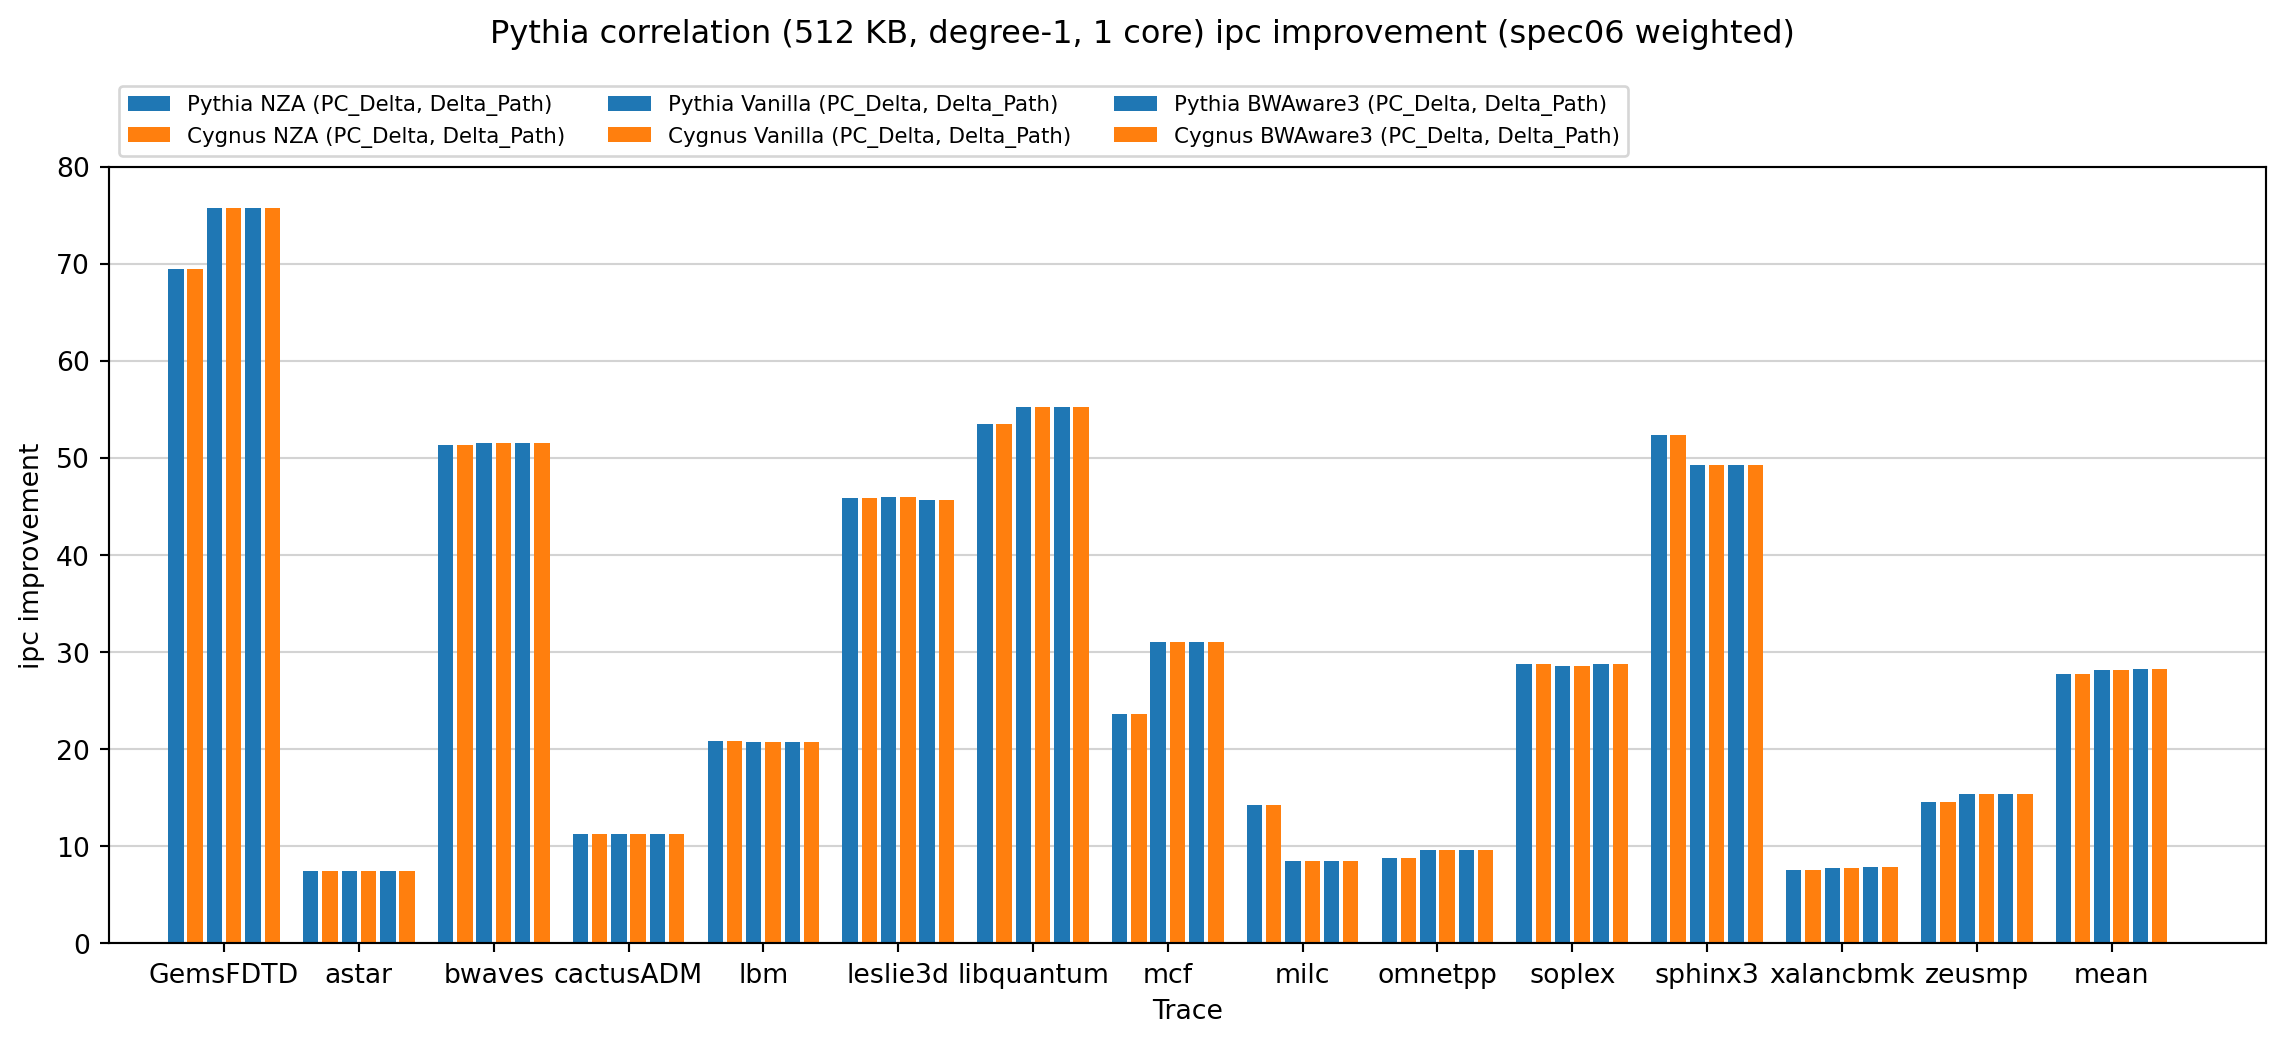

=== gap one_phase ===


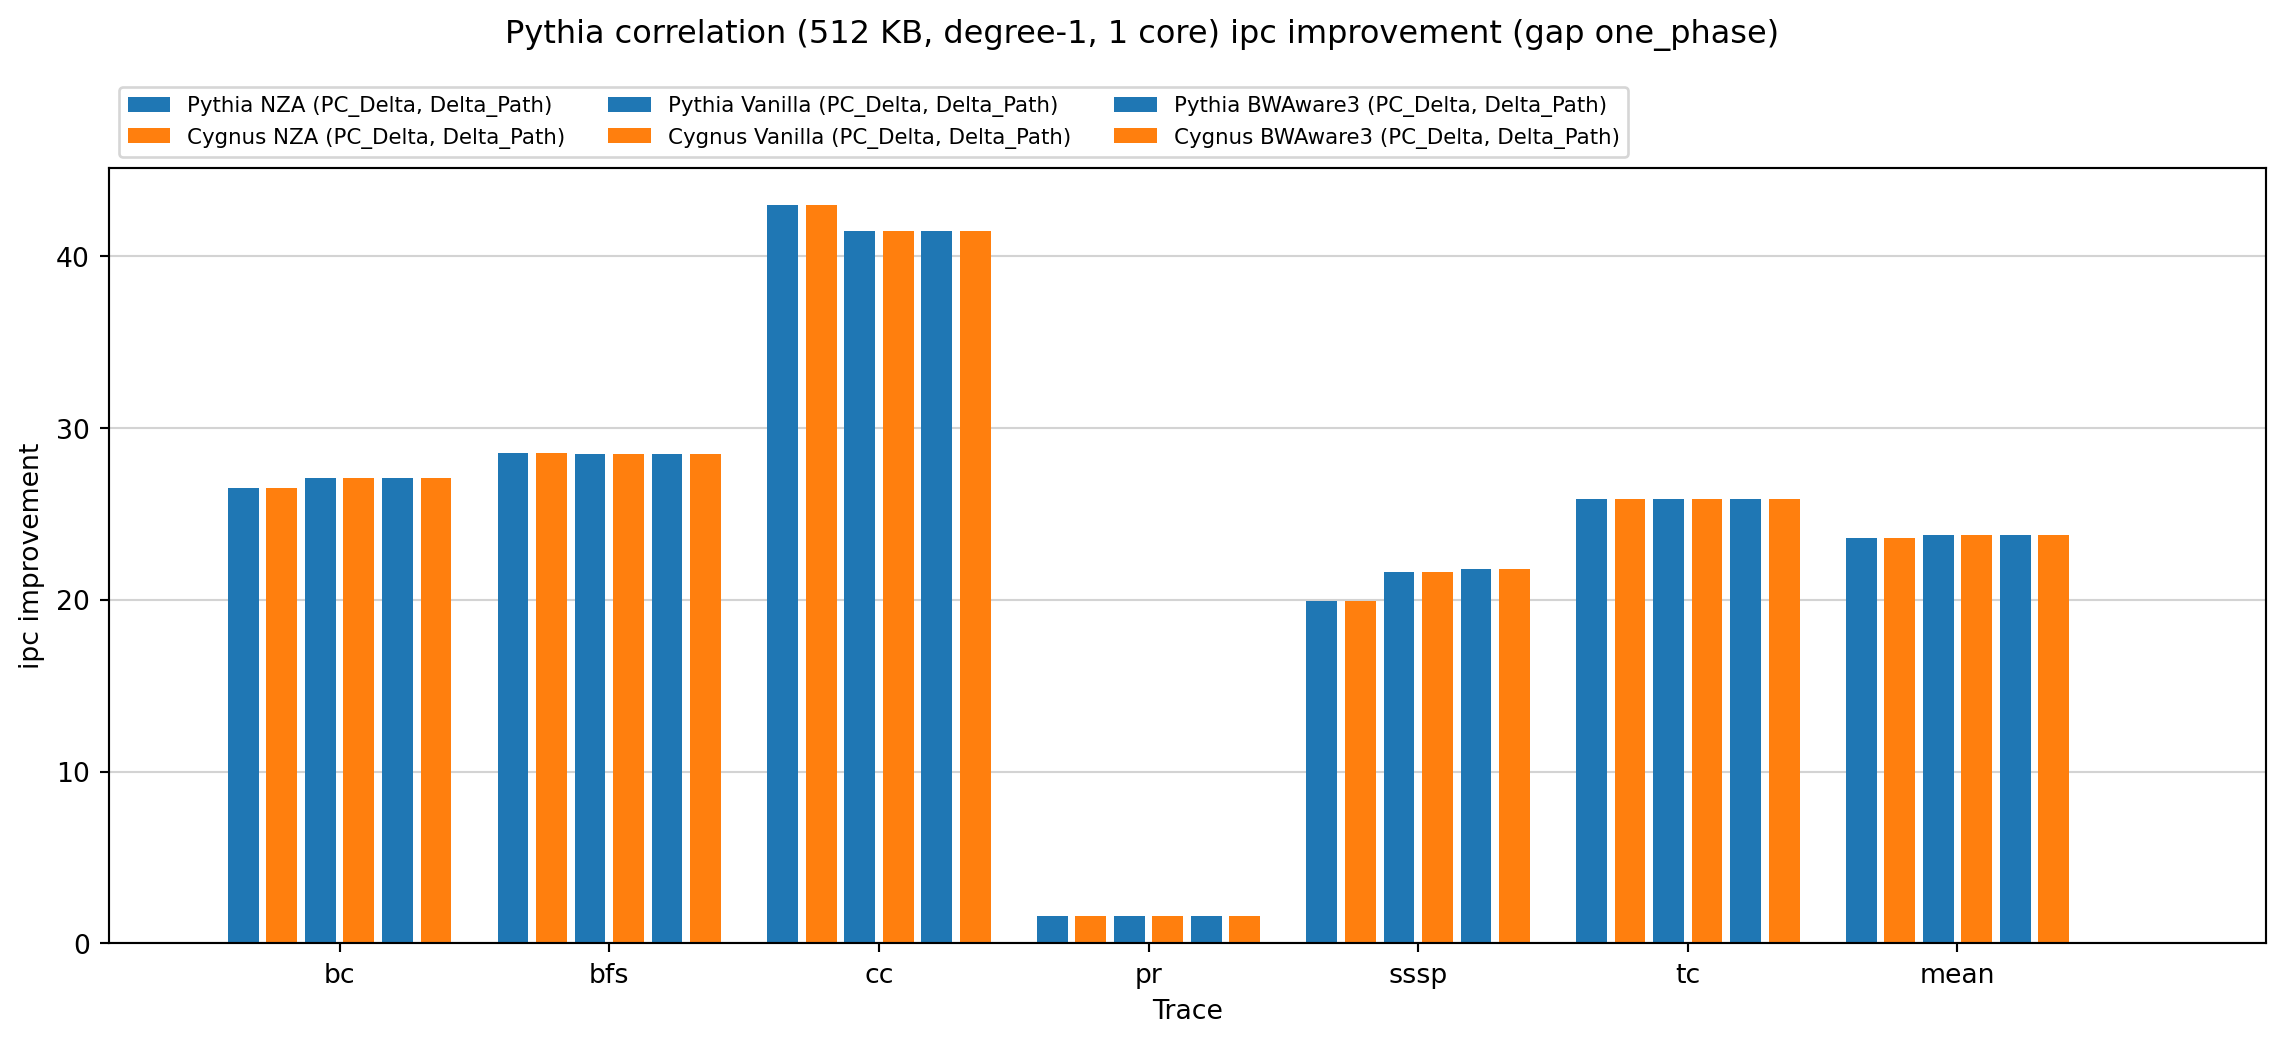

=== google one_phase ===


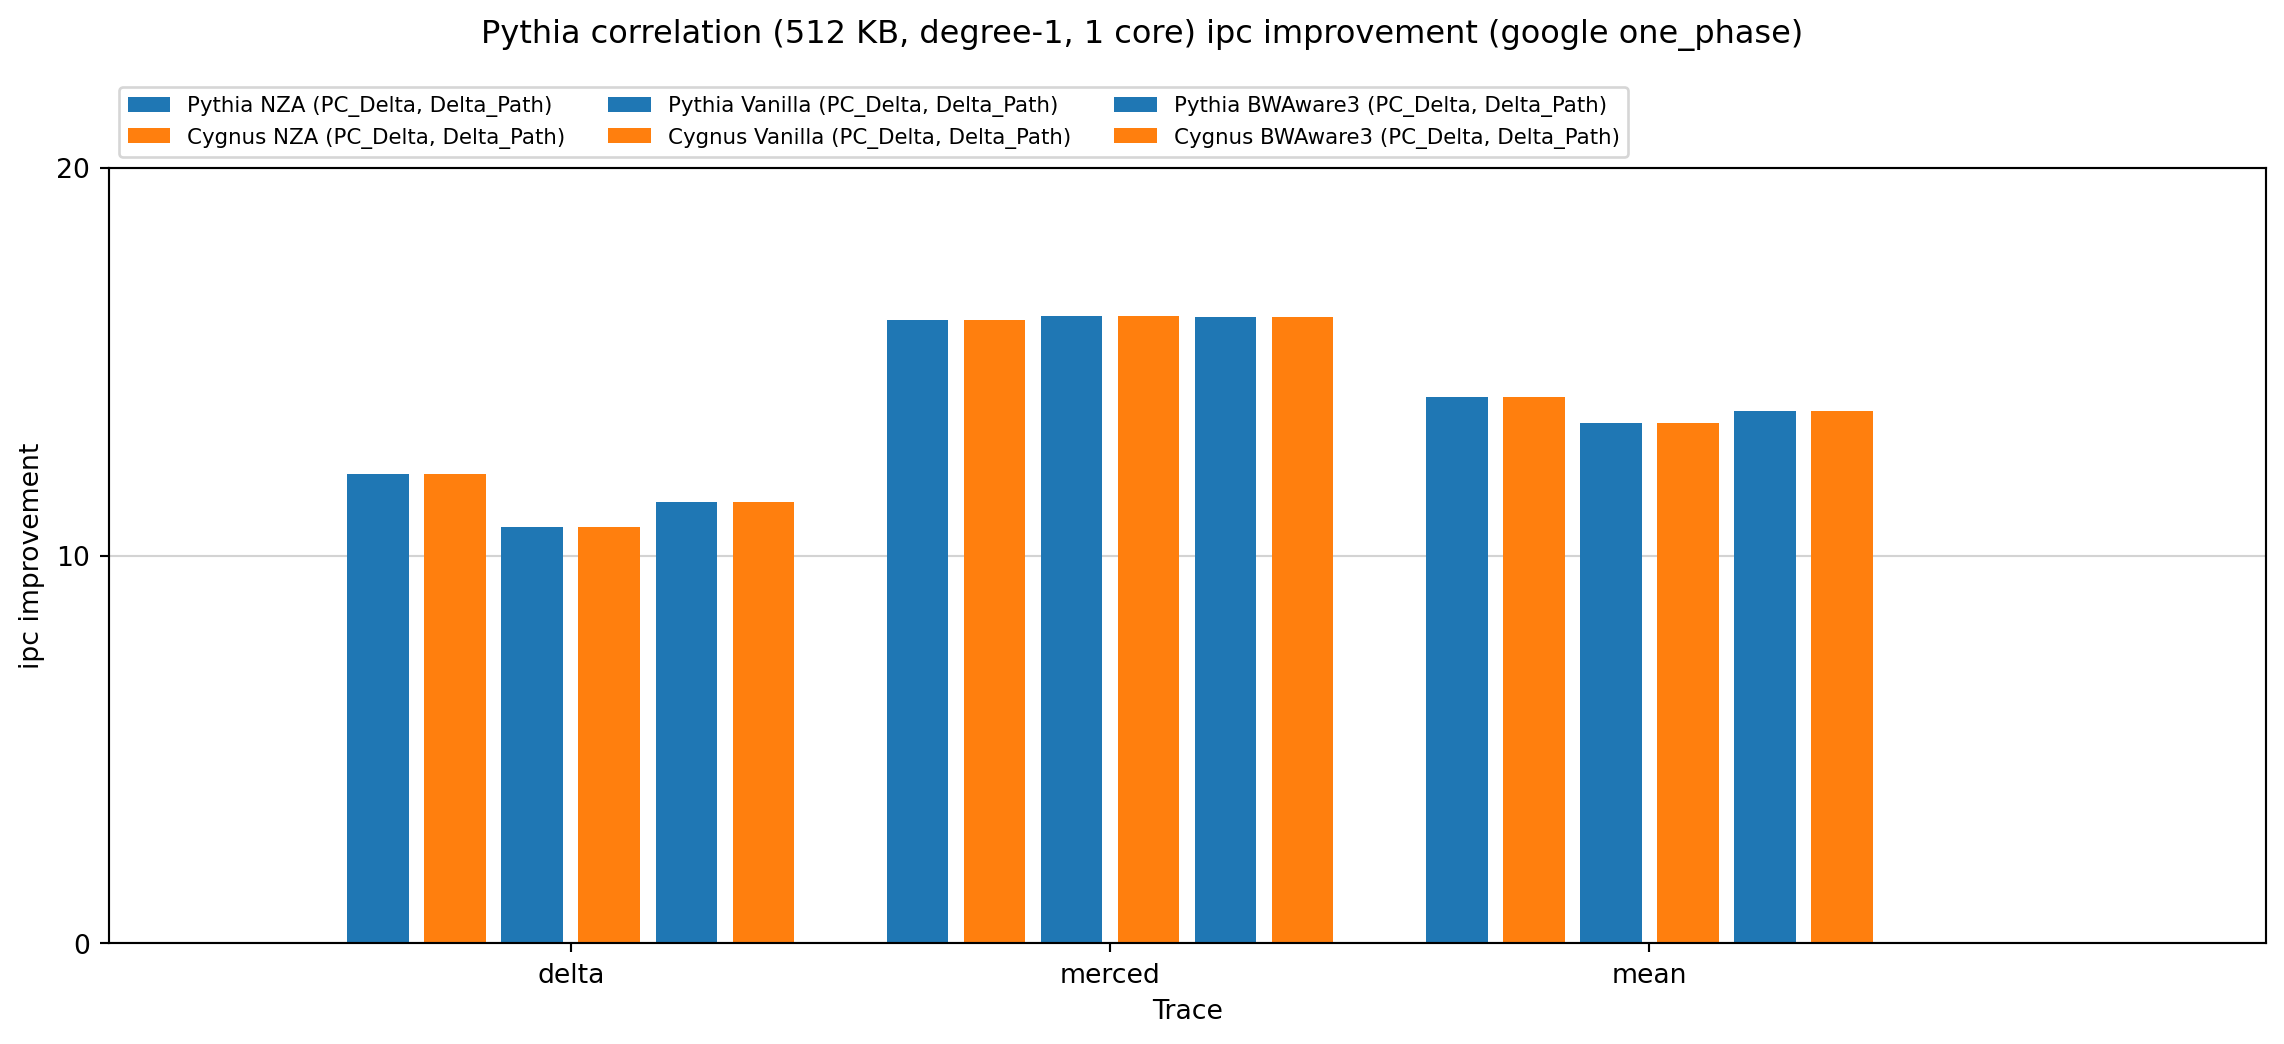

In [6]:
plots.plot_everything(degree1_1core_df, suites=suites, metrics=metrics, 
                      colors=get_colors(degree1_1core_df), 
                      legend_kwargs=degree1_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5), suptitle=degree1_1core_suptitle)

## 1-core, dynamic degree

In [7]:
degreedyn_1core_df = {
    'Pythia NZA (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Cygnus NZA (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike']['Delta_Path, PC_Delta'],
    #'Pythia NZA (PC)': dfs['degreedyn/pythia/nozeroaction']['PC'],
    #'Cygnus NZA (PC)': dfs['degreedyn/bythio/nozeroaction_pythialike']['PC'],
    #'Pythia NZA (Stateless)': dfs['degreedyn/pythia/nozeroaction']['Global'],
    #'Cygnus NZA (Stateless)': dfs['degreedyn/bythio/nozeroaction_pythialike']['Global'],
    'Pythia Vanilla (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/vanilla']['Delta_Path, PC_Delta'],
    'Cygnus Vanilla (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/vanilla_pythialike']['Delta_Path, PC_Delta'],
    'Pythia BWAware3 (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],
    'Cygnus BWAware3 (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/bwaware3_pythialike']['Delta_Path, PC_Delta'],
}

degreedyn_1core_legend_kwargs = {
    'ncol': 3,
    'fontsize': 8,
    'loc': 'lower left',
    'bbox_to_anchor': (0.0, 1.0),
}

degreedyn_1core_suptitle = 'Pythia correlation (512 KB, dynamic degree, 1 core)'

=== spec06 weighted ===


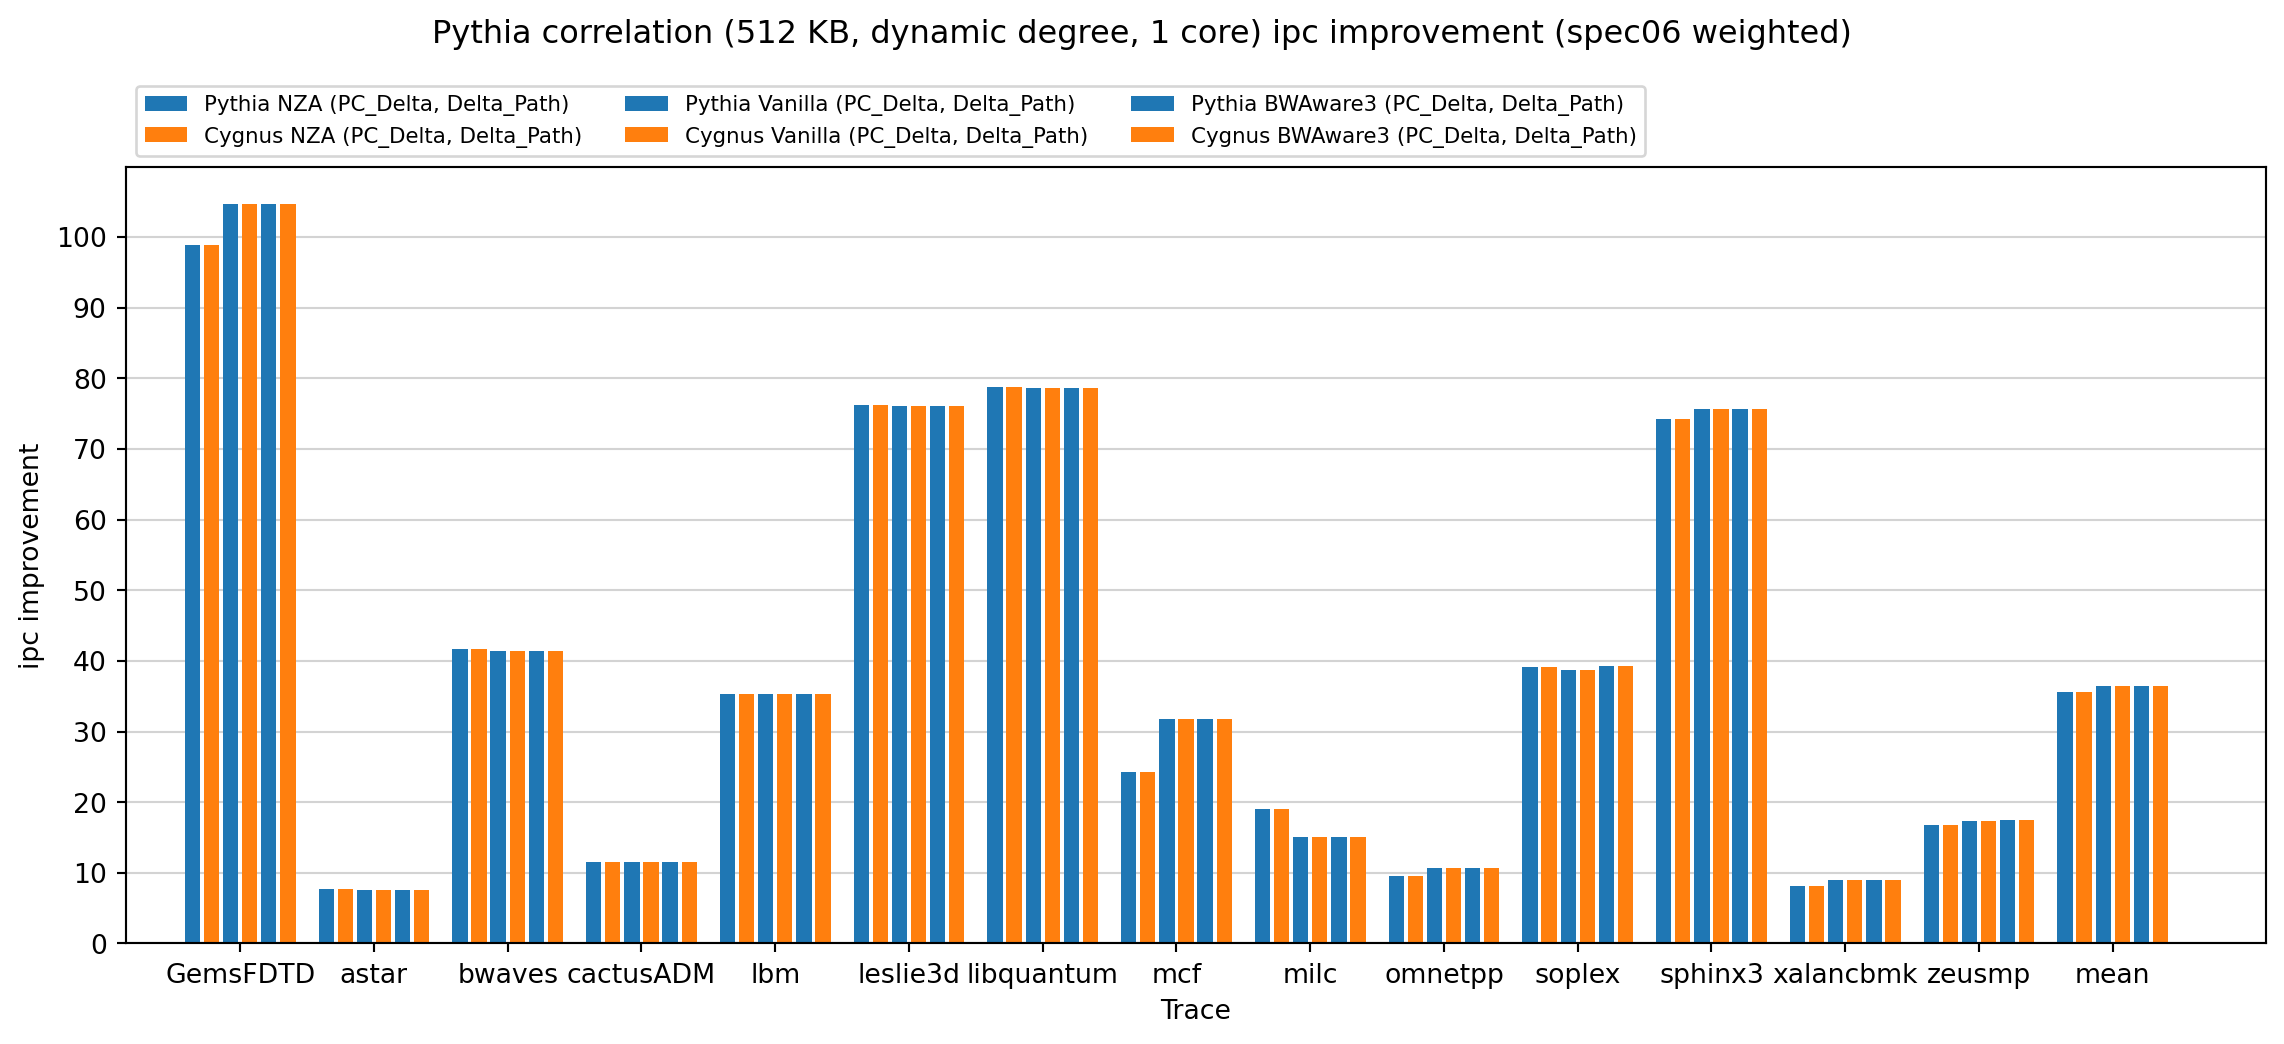

=== gap one_phase ===


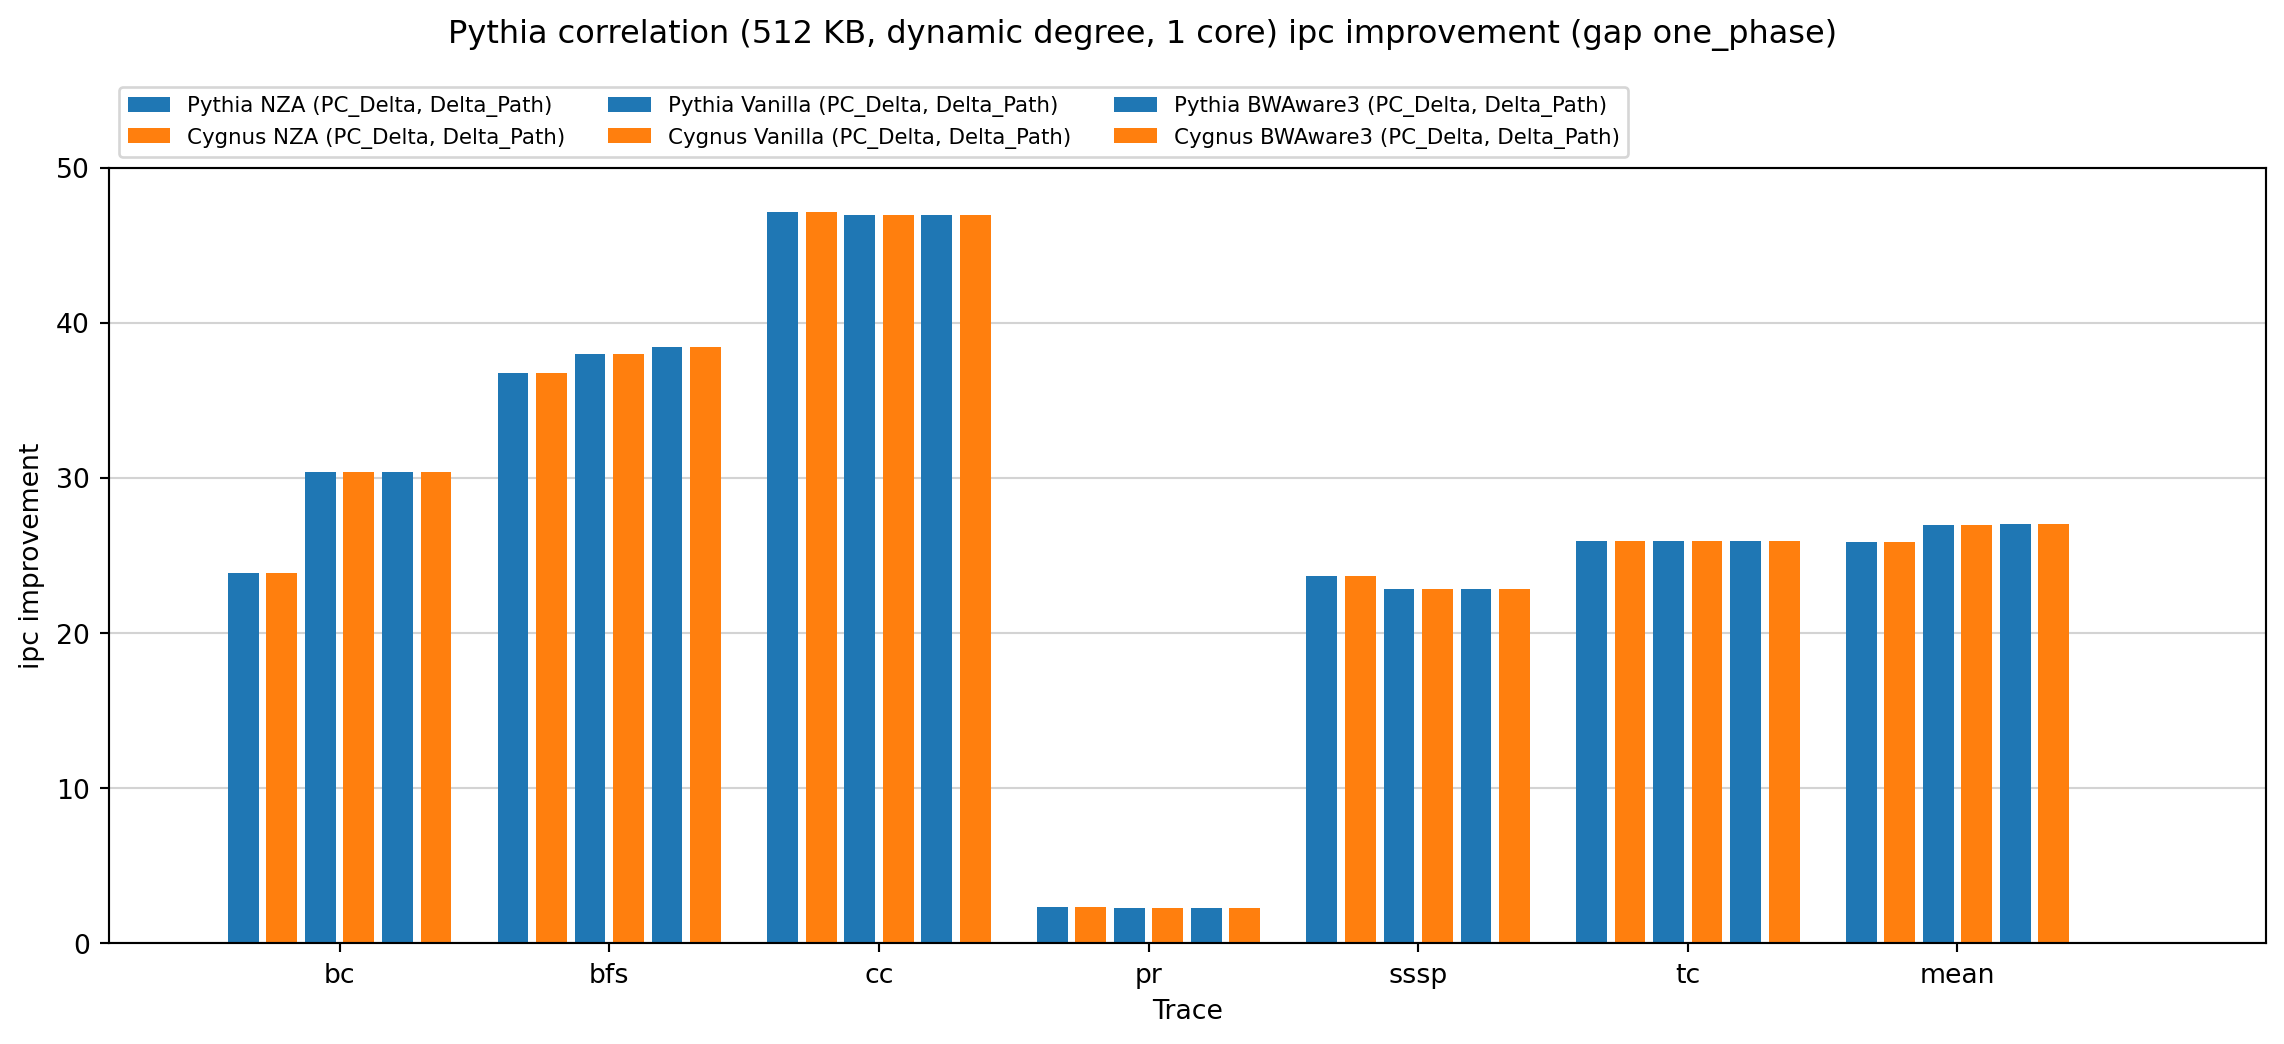

=== google one_phase ===


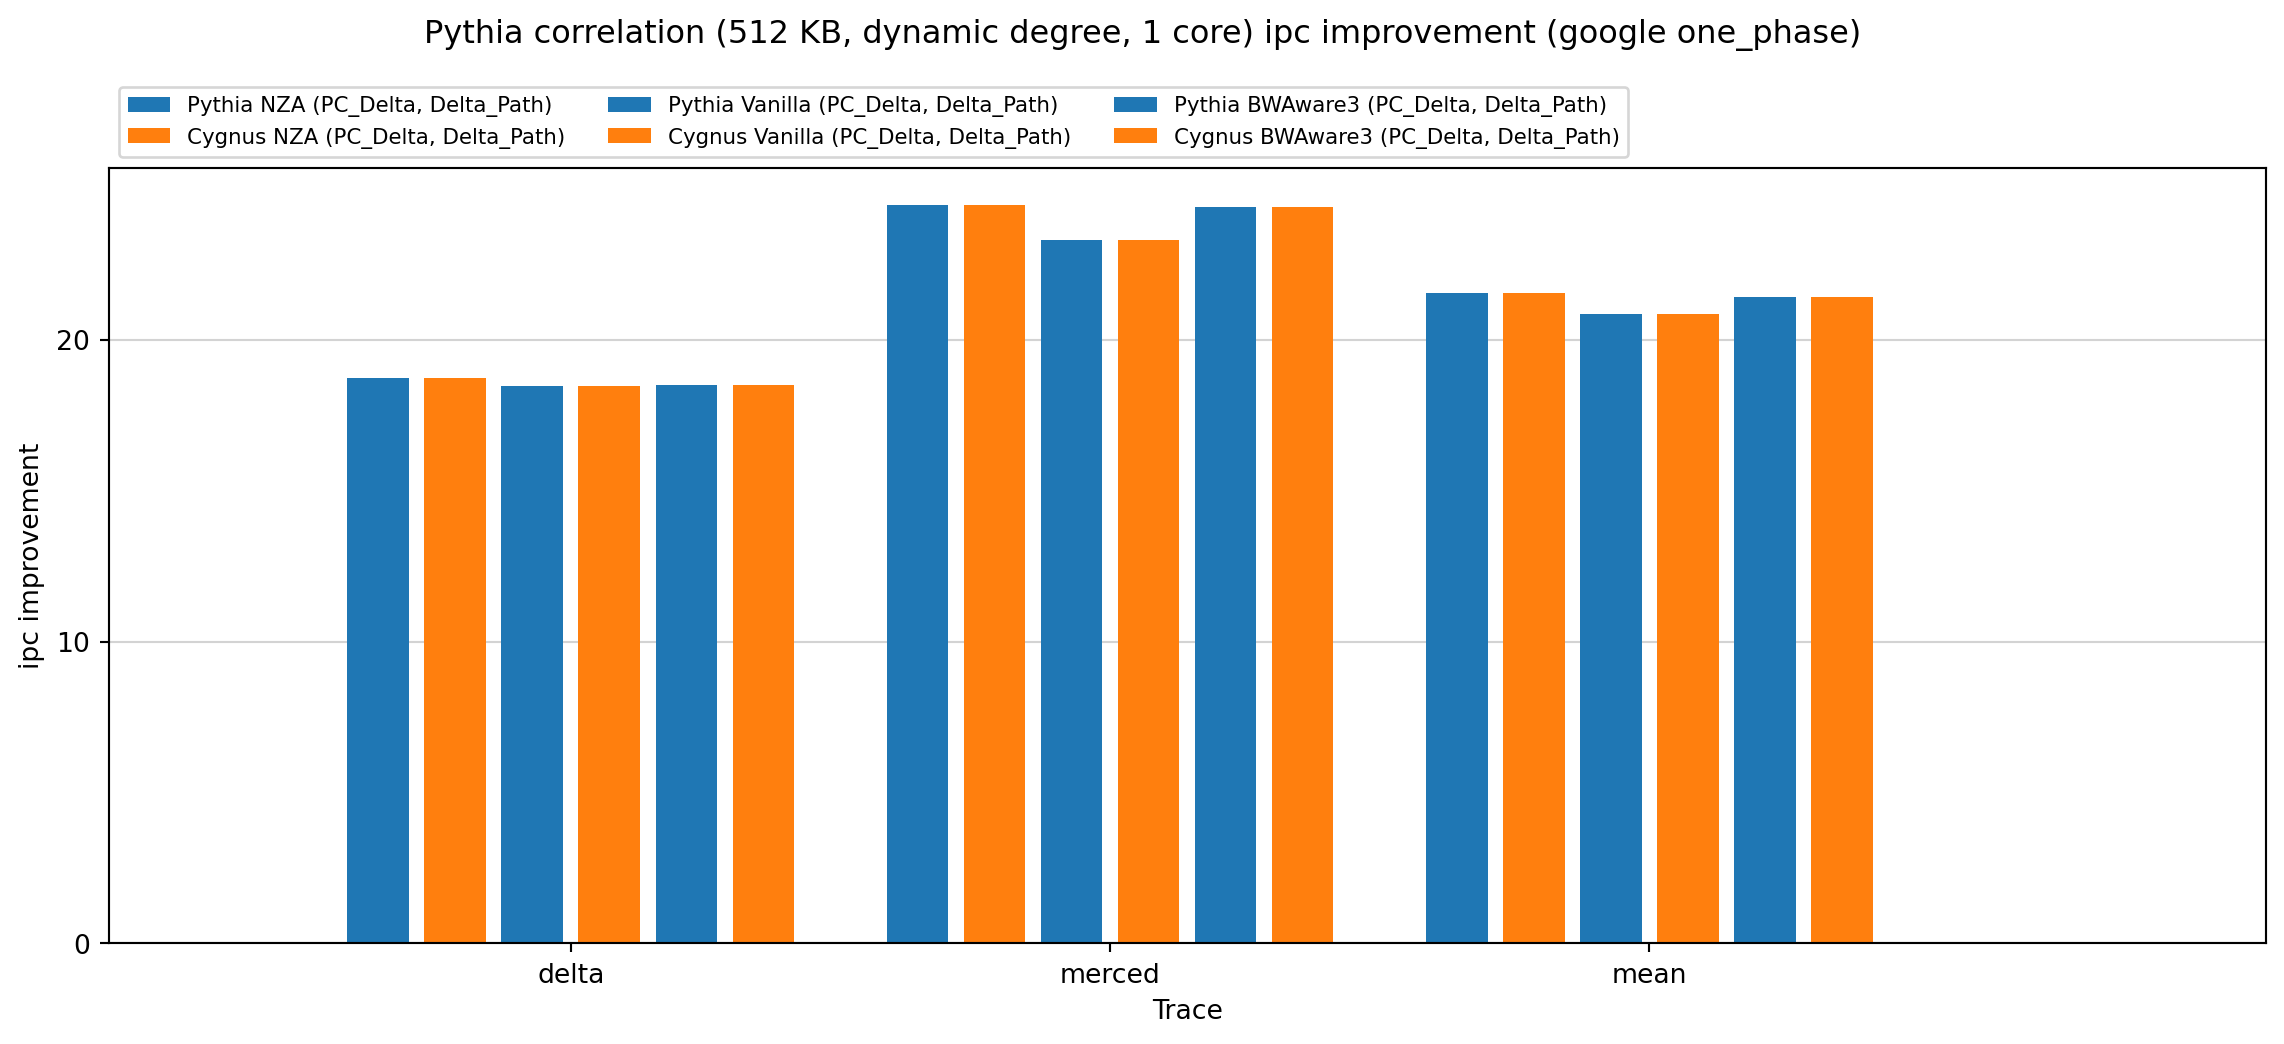

In [8]:
plots.plot_everything(degreedyn_1core_df, suites=suites, metrics=metrics, 
                      colors=get_colors(degreedyn_1core_df),
                      legend_kwargs=degreedyn_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_suptitle)

# Tables

## 1-core, degree 1

In [9]:
tables.table_everything(degree1_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,"Pythia NZA (PC_Delta, Delta_Path)","Cygnus NZA (PC_Delta, Delta_Path)","Pythia Vanilla (PC_Delta, Delta_Path)","Cygnus Vanilla (PC_Delta, Delta_Path)","Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,,,
GemsFDTD_weighted,69.456295,69.456295,75.760828,75.760828,75.760828,75.760828
astar_weighted,7.450956,7.450956,7.463633,7.463633,7.463633,7.463633
bwaves_weighted,51.280546,51.280546,51.569444,51.569444,51.569444,51.569444
cactusADM_weighted,11.259960,11.259960,11.251756,11.251756,11.251756,11.251756
lbm_weighted,20.845415,20.845415,20.790960,20.790960,20.790960,20.790960
leslie3d_weighted,45.852901,45.852901,46.010970,46.010970,45.703862,45.703862
libquantum_weighted,53.527977,53.527977,55.211937,55.211937,55.211937,55.211937
mcf_weighted,23.632759,23.632759,31.020467,31.020467,31.020467,31.020467
milc_weighted,14.217358,14.217358,8.447453,8.447453,8.447453,8.447453


=== gap one_phase ===
ipc_improvement


,"Pythia NZA (PC_Delta, Delta_Path)","Cygnus NZA (PC_Delta, Delta_Path)","Pythia Vanilla (PC_Delta, Delta_Path)","Cygnus Vanilla (PC_Delta, Delta_Path)","Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,,,
bc,26.507611,26.507611,27.115018,27.115018,27.116403,27.116403
bfs,28.537542,28.537542,28.470364,28.470364,28.517924,28.517924
cc,43.018854,43.018854,41.475461,41.475461,41.475461,41.475461
pr,1.601591,1.601591,1.582309,1.582309,1.582309,1.582309
sssp,19.908874,19.908874,21.644593,21.644593,21.815756,21.815756
tc,25.858010,25.858010,25.851008,25.851008,25.851008,25.851008
mean,23.602932,23.602932,23.758419,23.758419,23.795287,23.795287


=== google one_phase ===
ipc_improvement


,"Pythia NZA (PC_Delta, Delta_Path)","Cygnus NZA (PC_Delta, Delta_Path)","Pythia Vanilla (PC_Delta, Delta_Path)","Cygnus Vanilla (PC_Delta, Delta_Path)","Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,,,
delta_507252,12.101409,12.101409,10.726668,10.726668,11.372914,11.372914
merced_467642,16.084209,16.084209,16.167489,16.167489,16.145385,16.145385
mean,14.075429,14.075429,13.414456,13.414456,13.734120,13.734120


## 1-core, dynamic degree

In [10]:
tables.table_everything(degreedyn_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,"Pythia NZA (PC_Delta, Delta_Path)","Cygnus NZA (PC_Delta, Delta_Path)","Pythia Vanilla (PC_Delta, Delta_Path)","Cygnus Vanilla (PC_Delta, Delta_Path)","Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,,,
GemsFDTD_weighted,98.884459,98.884459,104.716560,104.716560,104.716560,104.716560
astar_weighted,7.640089,7.640089,7.517984,7.517984,7.517984,7.517984
bwaves_weighted,41.710011,41.710011,41.367983,41.367983,41.367983,41.367983
cactusADM_weighted,11.479364,11.479364,11.483537,11.483537,11.483537,11.483537
lbm_weighted,35.265506,35.265506,35.252199,35.252199,35.252199,35.252199
leslie3d_weighted,76.160892,76.160892,76.137086,76.137086,76.137086,76.137086
libquantum_weighted,78.746652,78.746652,78.595864,78.595864,78.595864,78.595864
mcf_weighted,24.209424,24.209424,31.829690,31.829690,31.829690,31.829690
milc_weighted,19.062668,19.062668,15.099107,15.099107,15.099107,15.099107


=== gap one_phase ===
ipc_improvement


,"Pythia NZA (PC_Delta, Delta_Path)","Cygnus NZA (PC_Delta, Delta_Path)","Pythia Vanilla (PC_Delta, Delta_Path)","Cygnus Vanilla (PC_Delta, Delta_Path)","Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,,,
bc,23.869400,23.869400,30.407892,30.407892,30.407892,30.407892
bfs,36.753661,36.753661,38.012603,38.012603,38.455898,38.455898
cc,47.133304,47.133304,46.920248,46.920248,46.920248,46.920248
pr,2.378886,2.378886,2.307785,2.307785,2.307785,2.307785
sssp,23.656980,23.656980,22.862315,22.862315,22.857465,22.857465
tc,25.956043,25.956043,25.965210,25.965210,25.965210,25.965210
mean,25.856893,25.856893,26.954192,26.954192,27.021228,27.021228


=== google one_phase ===
ipc_improvement


,"Pythia NZA (PC_Delta, Delta_Path)","Cygnus NZA (PC_Delta, Delta_Path)","Pythia Vanilla (PC_Delta, Delta_Path)","Cygnus Vanilla (PC_Delta, Delta_Path)","Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,,,
delta_507252,18.717053,18.717053,18.461746,18.461746,18.511067,18.511067
merced_467642,24.479325,24.479325,23.302432,23.302432,24.403461,24.403461
mean,21.564051,21.564051,20.857856,20.857856,21.421525,21.421525
